# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [5]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [7]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [8]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Ether’s Rise to Record Highs May Propel Cryptocurrency to $10.5K: Fundstrat Global.  Fundstrat strategist David Grider based his bullish prediction in part on the promise of Ethereum's technology. ... [| Skaityti daugiau](https://www.coindesk.com/ethers-rise-to-record-highs-may-propel-cryptocurrency-to-10-5k-fundstrat-global) 

In [9]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Tunisia youths warned over riots amid Covid curfew.  Protests continued for a fifth night over high unemployment and an economic crisis. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-africa-55733224) 

### Kainų kaita pandemijos metu

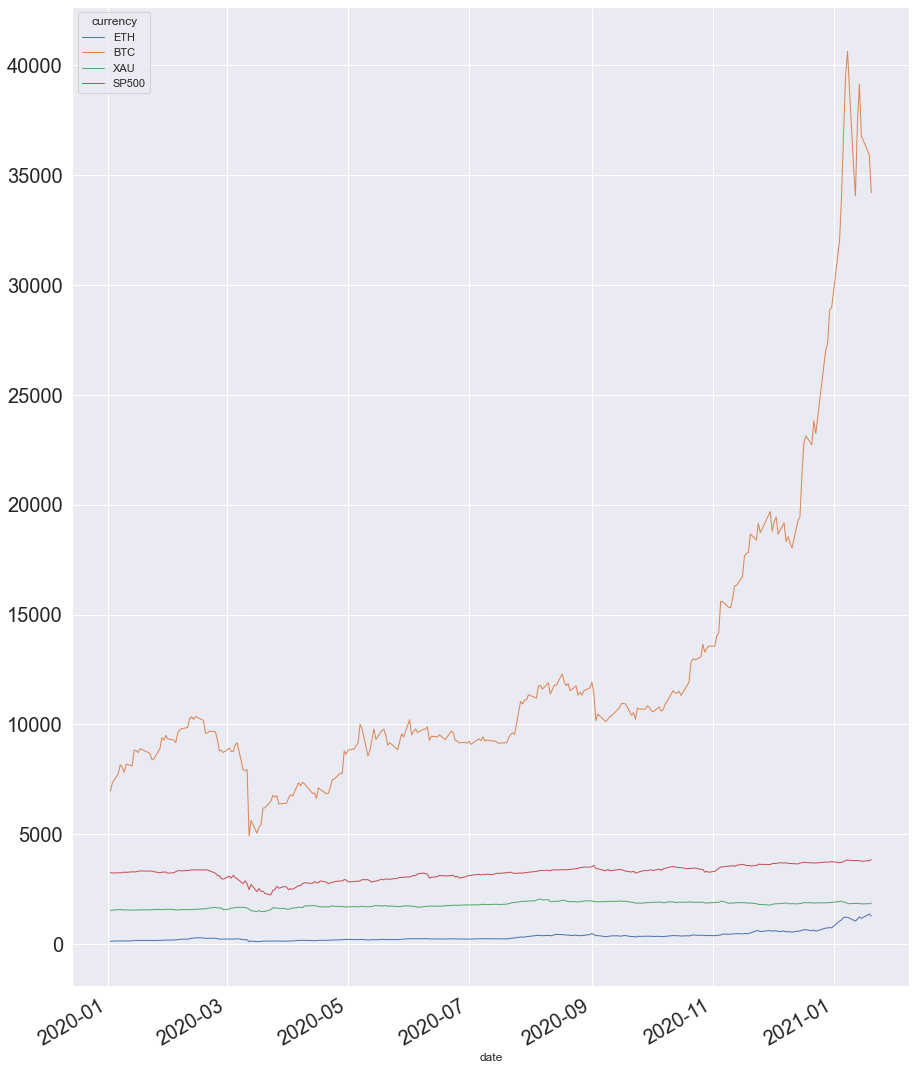

In [10]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [11]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.974230,0.541304,0.742794
BTC,0.974230,1.000000,0.427033,0.720452
XAU,0.541304,0.427033,1.000000,0.582116
SP500,0.742794,0.720452,0.582116,1.000000


In [12]:
#hide ### Koreliacijos matrica.

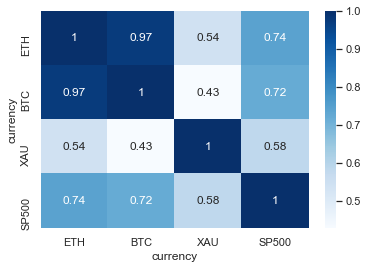

In [13]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')